<a href="https://colab.research.google.com/github/TVHM/summer_microcredentials_BUS/blob/main/Group_7_Mini_Project_4_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

**Load Data**

In [ ]:
df=pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Target:Outcome**

Notice zero values for blood pressure, skin thickness, insulin, BMI, etc. Ignore for now.

In [ ]:
# Check for nulls
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Exploratory Data Analysis**

In [ ]:
# Compute pairwise correlation of columns, excluding NA/null values
correlation_matrix = df.corr()
correlation_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


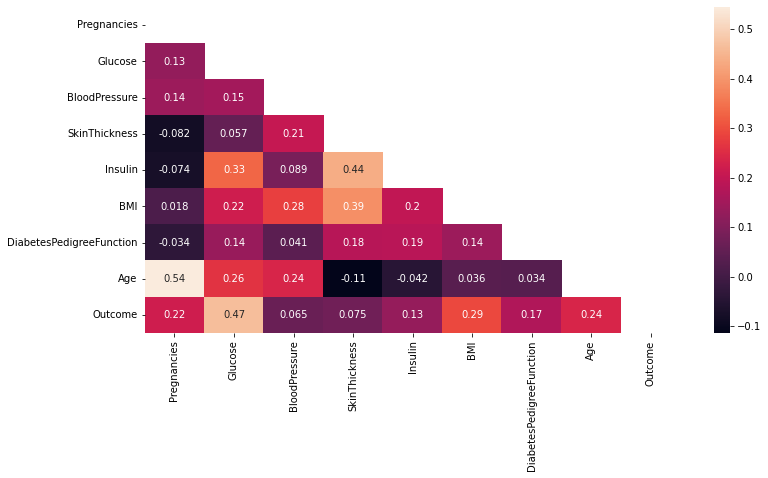

In [ ]:
# Plot data as a color-encoded matrix.
plt.subplots(figsize=(12,6))
mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation_matrix,
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            annot=True, mask=mask)
plt.savefig('DiabetesCorrelationMatrix')

In [ ]:
# Review distribution of targets (outcome)
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

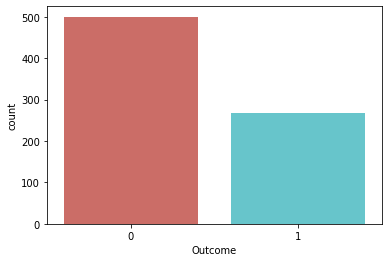

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot outcome counts
sns.countplot(x='Outcome', data=df, palette='hls')
plt.show()
plt.savefig('DiabetesOutcome_plot')

**Prepare Data**

In [ ]:
df['Outcome'].unique()

array([1, 0])

In [ ]:
# Prepare data set for training
X = df.iloc[:, :-1]     # feature values - all columns except last one
y = df.iloc[:, -1]      # target values - last column of data frame

In [ ]:
# Split data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [ ]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
355,9,165,88,0,0,30.4,0.302,49
534,1,77,56,30,56,33.3,1.251,24
344,8,95,72,0,0,36.8,0.485,57
296,2,146,70,38,360,28.0,0.337,29


**Normalization**

In [ ]:
# Normalize data 
means = np.mean(x_train, axis=0)       # Compute average (mean)
stds = np.std(x_train, axis=0)         # Compute standard deviation

x_train = (x_train - means) / stds     # Normalize data values in training set
x_test = (x_test - means) / stds     # Normalize data values in test set

In [ ]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,-0.526397,-1.151398,-3.752683,-1.322774,-0.701206,-4.135256,-0.490735,-1.035940
618,1.588046,-0.276643,0.680345,0.233505,-0.701206,-0.489169,2.415030,1.487101
346,-0.828460,0.566871,-1.265862,-0.090720,0.013448,-0.424522,0.549161,-0.948939
294,-1.130523,1.254179,-1.049617,-1.322774,-0.701206,-1.303720,-0.639291,2.792122
231,0.681856,0.410665,0.572222,1.076490,2.484601,1.838121,-0.686829,1.139095
...,...,...,...,...,...,...,...,...
71,0.379793,0.566871,-0.292759,0.946800,0.504235,-0.437451,-0.172824,-0.600933
106,-0.828460,-0.776503,2.842797,-1.322774,-0.701206,-1.239073,-0.778934,-0.513932
270,1.890109,-0.620297,0.896590,1.076490,-0.701206,1.760544,1.981245,0.443084
435,-1.130523,0.629354,-3.752683,-1.322774,-0.701206,1.346804,-0.784877,-0.339929


In [ ]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,0.681856,-0.714020,-0.617127,0.817110,0.934749,0.260736,-0.116372,0.878091
324,-0.526397,-0.276643,0.301916,0.752265,-0.701206,0.480535,-0.954231,-1.035940
624,-0.526397,-0.401608,-0.292759,-1.322774,-0.701206,-0.153005,-0.924520,-1.035940
690,1.285983,-0.432849,0.572222,-1.322774,-0.701206,-0.954627,1.149329,0.095078
473,0.983919,0.473147,1.112835,-1.322774,-0.701206,-0.269369,-0.770021,1.487101
...,...,...,...,...,...,...,...,...
355,1.588046,1.379144,1.004713,-1.322774,-0.701206,-0.204722,-0.496677,1.400099
534,-0.828460,-1.370087,-0.725249,0.622575,-0.219029,0.170230,2.322925,-0.774936
344,1.285983,-0.807744,0.139732,-1.322774,-0.701206,0.622758,0.047040,2.096111
296,-0.526397,0.785560,0.031609,1.141335,2.398498,-0.515028,-0.392688,-0.339929


**Train Model**

In [ ]:
# Train logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

**Model Evaluation**

Model performance metrics

In [ ]:
# Test the model
predictions = model.predict(x_test)

# Check precision, recall, f1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [ ]:
# Display coefficients
coeff = list(model.coef_[0])
coeff

[0.21255832656458146,
 1.0711323063584446,
 -0.2478415409014392,
 0.04569683324571533,
 -0.20082660350303616,
 0.7781515135997503,
 0.23060672851451666,
 0.4210017519121533]

In [ ]:
# Extract feature names
labels = list(df.drop('Outcome',1).columns)
labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

Text(0.5, 0, 'Importance')

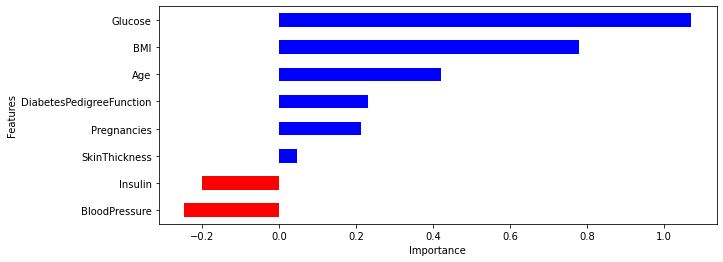

In [ ]:
# Visualize how the model uses different features and which features have greater effect
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(10, 4),
                         color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

**Model Accuarcy**

In [ ]:
# Calculate model accuracy
accuracy = model.score(x_test, y_test)
print("accuracy = ", accuracy * 100, "%")

accuracy =  75.32467532467533 %


**Confusion Matrix**

In [ ]:
confusion_matrix(y_test, predictions)

array([[79, 20],
       [18, 37]])

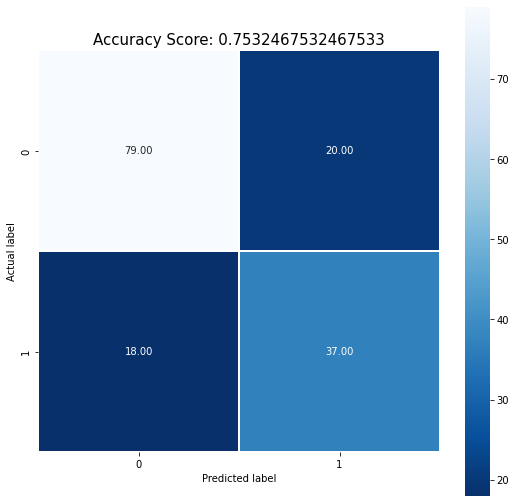

In [ ]:
#visualize confusion matrix
plt.figure(figsize = (9,9))
sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt = '.2f', linewidths = 0.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
sample_title = 'Accuracy Score: {}'.format(accuracy_score(y_test, predictions))
plt.title(sample_title, size = 15)
plt.savefig('Accuracy Score.png', bbox_inches="tight")

**End Credit**

In [ ]:
print("--Team 7--")
print("In Order of Appearance")
print("---------------")
print("*Tonya McPhearson")
print("*Huynh Ngoc Chau Le")
print("*Tashi palden")
print("*Emery Wang")

--Team 7--
In Order of Appearance
---------------
*Tonya McPhearson
*Huynh Ngoc Chau Le
*Tashi palden
*Emery Wang
